In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

C:\Users\damaj\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


<ipython-input-2-557577ecab90>:6: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  GH1 = pd.read_csv(file1, encoding='latin1')


                        label  GH_count  GH_percentage  HF_count  \
0              add dependency      3432       2.274188       236   
1      external documentation     31626      20.956723      6651   
2                  input data      3906       2.588281        88   
3      internal documentation      7717       5.113610       120   
4             model structure     44812      29.694323      2462   
5                 output data       466       0.308791       601   
6            parameter tuning      4525       2.998456      1562   
7        pipeline performance      4800       3.180683        30   
8               preprocessing      8533       5.654326      2843   
9            project metadata      5541       3.671701      1409   
10          remove dependency       906       0.600354       104   
11                    sharing      6978       4.623917       721   
12    training infrastructure     13606       9.015910       132   
13          update dependency      3495       2.

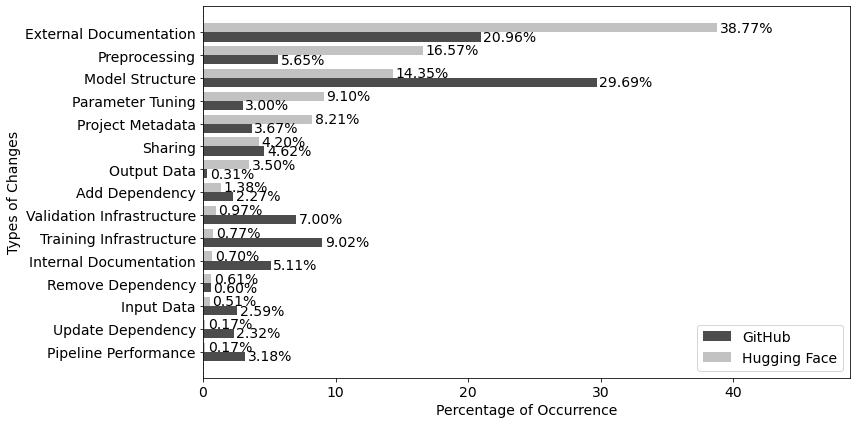

                        label  GH_count  GH_percentage
0              add dependency      3432       2.274188
1      external documentation     31626      20.956723
2                  input data      3906       2.588281
3      internal documentation      7717       5.113610
4             model structure     44812      29.694323
5                 output data       466       0.308791
6            parameter tuning      4525       2.998456
7        pipeline performance      4800       3.180683
8               preprocessing      8533       5.654326
9            project metadata      5541       3.671701
10          remove dependency       906       0.600354
11                    sharing      6978       4.623917
12    training infrastructure     13606       9.015910
13          update dependency      3495       2.315935
14  validation infrastructure     10568       7.002803
                        label  HF_count  HF_percentage
0              add dependency       236       1.375612
1      ext

In [2]:
# Load the CSV files
file1 = "GH_labelled_combined_csv_file.csv"
file2 = "HF_all_labels_from_gemini.csv"
f2 = "must_exclude_from_all_analysis.csv"

GH1 = pd.read_csv(file1, encoding='latin1')
HF1 = pd.read_csv(file2, encoding='latin1')
dfs2 = pd.read_csv(f2, encoding='latin1')

exclusion = list(dfs2['family'].unique())
excluded_labels = ['bug fix', 'unclear', 'uncategorized', 'add model']

GH2 = GH1[~GH1['label'].isin(exclusion)]
HF2 = HF1[~HF1['label'].isin(exclusion)]

GH = GH2[~GH2['label'].isin(excluded_labels)]
HF = HF2[~HF2['label'].isin(excluded_labels)]

GH_group = GH.groupby('label').size().reset_index(name='GH_count')
HF_group = HF.groupby('label').size().reset_index(name='HF_count')

# Calculate total counts for each platform
GH_total = GH_group['GH_count'].sum()
HF_total = HF_group['HF_count'].sum()

# Calculate percentages
GH_group['GH_percentage'] = GH_group['GH_count'] / GH_total * 100
HF_group['HF_percentage'] = HF_group['HF_count'] / HF_total * 100

# Merge the two dataframes
merged_df = pd.merge(GH_group, HF_group, on='label', how='outer').fillna(0)
print(merged_df)
# Calculate the difference in percentages
merged_df['percentage_difference'] = merged_df['GH_percentage'] - merged_df['HF_percentage']

# Sort by the absolute difference in percentages
merged_df = merged_df.sort_values(by='HF_percentage', ascending=True)

# Capitalize each word in the 'label' column
merged_df['label'] = merged_df['label'].str.title()

# Visualize the results
plt.figure(figsize=(12, 6))
y = np.arange(len(merged_df['label']))
height = 0.40

# Create horizontal bars with gray colors
bars1 = plt.barh(y - height/2, merged_df['GH_percentage'], height, label='GitHub', color='black', alpha=0.7)
bars2 = plt.barh(y + height/2, merged_df['HF_percentage'], height, label='Hugging Face', color='darkgrey', alpha=0.7)

# Add percentage labels outside the bars with slight adjustments to avoid overlap
for i, v in enumerate(merged_df['GH_percentage']):
    plt.text(v + 0.2, i - height/2, f'{v:.2f}%', va='center', color='black', fontsize=14)

for i, v in enumerate(merged_df['HF_percentage']):
    # Adjust x position of text label to ensure it stays inside the plot area
    plt.text(v + 0.2, i + height/2, f'{v:.2f}%', va='center', color='black', fontsize=14)

# Adjust the x-axis limits to make room for the labels
plt.xlim(0, max(merged_df['GH_percentage'].max(), merged_df['HF_percentage'].max()) + 10)

# Set labels and ticks
plt.ylabel('Types of Changes', fontsize=14)
plt.xlabel('Percentage of Occurrence', fontsize=14)
plt.yticks(y, merged_df['label'], fontsize=14)
plt.xticks(fontsize=14)
plt.legend(fontsize=14)

# Add a vertical line at x=0 for better readability
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.savefig("RQ01.pdf", bbox_inches='tight')
plt.show()

# Display the updated DataFrames
print(GH_group)
print(HF_group)

<ipython-input-3-932cc7d3a6b3>:11: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  GH1 = pd.read_csv(file1, encoding='latin1')
<ipython-input-3-932cc7d3a6b3>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{int(tick / total * 100)}%" for tick in ax.get_yticks()], fontsize=14, color='black')


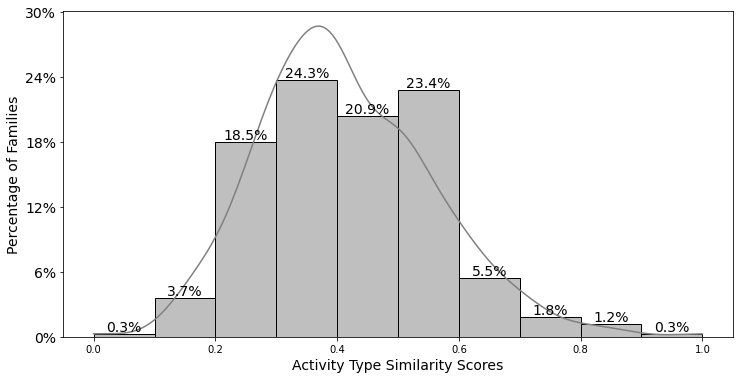

                            Family  Similarity Score
0            HooshvareLab_parsbert          0.375000
1                 meta-llama_Llama          0.545455
2    stabilityai_japanese-stablelm          0.375000
3                  bhadresh-savani          0.333333
4               kuelumbus_polyBERT          0.500000
..                             ...               ...
320                Qwen_Qwen-Audio          0.500000
321                    ielab_TILDE          0.333333
322            colorfulscoop_sbert          0.600000
323            lucadiliello_BLEURT          0.333333
324            protectai_llm-guard          0.266667

[325 rows x 2 columns]

Top 5 Most Similar Families:
facebook_dragon             1.000000
bigscience_workshop         0.866667
stabilityai_StableBeluga    0.833333
MoritzLaurer_DeBERTa        0.800000
distilbert_distilbert       0.800000
dtype: float64

Bottom 5 Least Similar Families:
Nexusflow_NexusRaven     0.000000
microsoft_infoxlm        0.133333
cais_Har

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV files
file1 = "GH_labelled_combined_csv_file.csv"
file2 = "HF_all_labels_from_gemini.csv"
f2 = "must_exclude_from_all_analysis.csv"

GH1 = pd.read_csv(file1, encoding='latin1')
HF1 = pd.read_csv(file2, encoding='latin1')
dfs2 = pd.read_csv(f2, encoding='latin1')

exclusion = list(dfs2['family'].unique())
excluded_labels = ['bug fix', 'unclear', 'uncategorized', 'add model']

GH2 = GH1[~GH1['family'].isin(exclusion)]
HF2 = HF1[~HF1['family'].isin(exclusion)]

GH = GH2[~GH2['label'].isin(excluded_labels)]
HF = HF2[~HF2['label'].isin(excluded_labels)]

HF_grouped = HF.groupby('family')['label'].value_counts(normalize=True).unstack(fill_value=0)
GH_grouped = GH.groupby('family')['label'].value_counts(normalize=True).unstack(fill_value=0)

# Calculate Jaccard similarity
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

similarity_scores = {}
for family in set(HF_grouped.index).intersection(set(GH_grouped.index)):
    hf_activities = set(HF_grouped.loc[family].index[HF_grouped.loc[family] > 0])
    gh_activities = set(GH_grouped.loc[family].index[GH_grouped.loc[family] > 0])
    similarity_scores[family] = jaccard_similarity(hf_activities, gh_activities)

# Convert similarity scores to a Pandas Series
similarity_series = pd.Series(similarity_scores)

# Plot histogram with percentages
plt.figure(figsize=(12, 6))
ax = sns.histplot(similarity_series, kde=True, bins=10, color='gray')  # Set bars to gray

# Convert y-axis counts to percentage
total = len(similarity_series)
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid annotating empty bins
        percentage = f"{(height / total) * 100:.1f}%"
        ax.text(p.get_x() + p.get_width() / 2, height, percentage,
                ha='center', va='bottom', fontsize=14, color='black')  # Text color set to black

# Adjust y-axis labels to percentages
ax.set_yticklabels([f"{int(tick / total * 100)}%" for tick in ax.get_yticks()], fontsize=14, color='black')

# Titles and labels with black text color
plt.xlabel('Activity Type Similarity Scores', fontsize=14, color='black')
plt.ylabel('Percentage of Families', fontsize=14, color='black')

# Keep the background white (default)
plt.gcf().set_facecolor('white')
ax.set_facecolor('white')

# Optionally, add a light gray grid for better visibility
#ax.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Save the plot
plt.savefig('similarity_distribution.pdf', dpi=300, bbox_inches='tight')
plt.savefig("RQ02.pdf", bbox_inches='tight')
plt.show()
#plt.show()

# Summary statistics
summary_stats = similarity_series.describe()
#print("Summary Statistics of Similarity Scores:")
#print(similarity_series)
similarity_df = similarity_series.to_frame(name='Similarity Score')

# Reset the index to make 'Family' a column
similarity_df = similarity_df.reset_index()

# Rename the 'index' column to 'Family'
similarity_df = similarity_df.rename(columns={'index': 'Family'})
print(similarity_df)

# Save results to CSV
#similarity_df.to_csv('I:/Paper2/PAPER2_experiment_steps/NLP/Experiment_for_top_models/RQ0_result/family_similarity_scores.csv', index=False)

# Find families with highest and lowest similarity
top_5_similar = similarity_series.nlargest(5)
bottom_5_similar = similarity_series.nsmallest(5)

print("\nTop 5 Most Similar Families:")
print(top_5_similar)

print("\nBottom 5 Least Similar Families:")
print(bottom_5_similar)

# Save results to CSV
results_df = pd.DataFrame.from_dict(similarity_scores, orient='index', columns=['Similarity Score'])
similarity_df.to_csv('family_similarity_scores.csv', index=False)

print("\nResults saved to 'family_similarity_scores.csv'")


In [4]:
file1 = "GH_data_devil.csv"
file2 = "HF_data_devil.csv"

df1 = pd.read_csv(file1, encoding='latin1')
df2 = pd.read_csv(file2, encoding='latin1')

<ipython-input-4-0da0ef8237c3>:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file1, encoding='latin1')


age_group
Intermediate-Families    100.0
Matured-Families         100.0
Recent-Families          100.0
Name: percentage, dtype: float64
age_group
Intermediate-Families    100.0
Matured-Families         100.0
Recent-Families          100.0
Name: percentage, dtype: float64


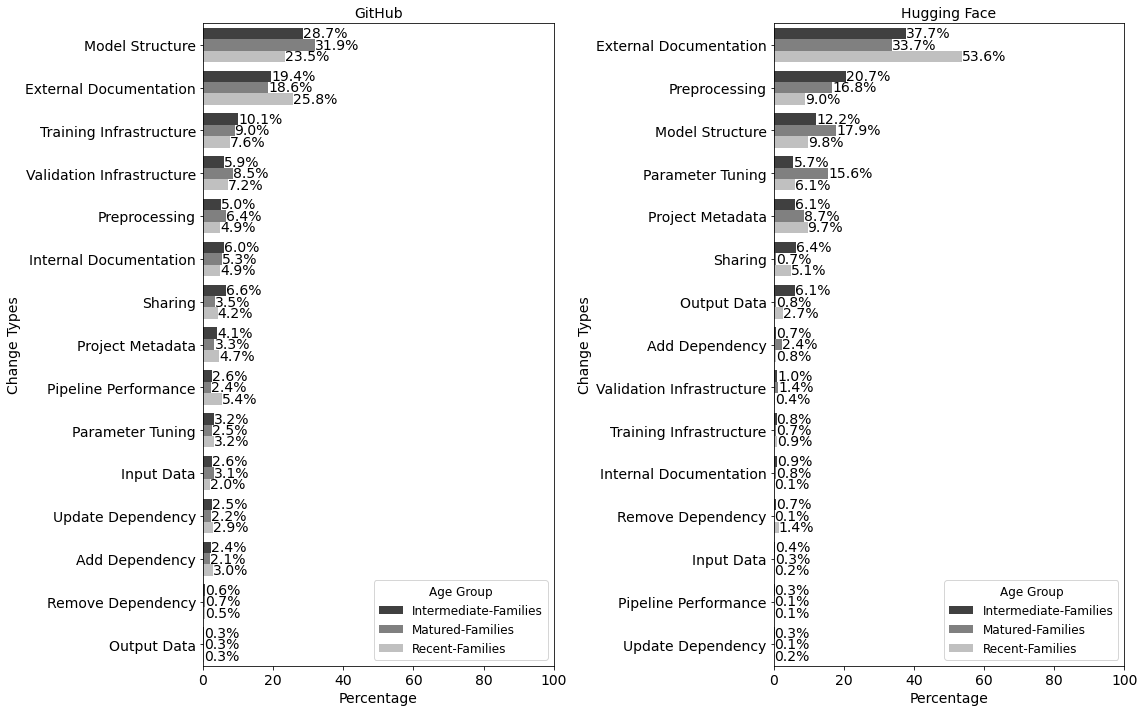

In [5]:
def capitalize_words(text):
    return ' '.join(word.capitalize() for word in text.split())

def plot_activity_distribution(df, title, ax):
    df['label'] = df['label'].apply(capitalize_words)

    # Group by 'age_group' and 'label' to get the count of each activity in each age group
    activity_counts = df.groupby(['age_group', 'label']).size().reset_index(name='count')

    # Calculate percentages within each age_group
    activity_counts['percentage'] = activity_counts.groupby('age_group')['count'].transform(lambda x: x / x.sum() * 100)
    #print(activity_counts)

    # Sort labels by total count
    label_order = activity_counts.groupby('label')['count'].sum().sort_values(ascending=False).index
    check = activity_counts.groupby("age_group")["percentage"].sum()
    print(check)

    # Create a horizontal grouped bar plot
    sns.barplot(
        data=activity_counts,
        y='label',
        x='percentage',
        hue='age_group',
        palette='gray',  # Use muted colors for a subtle appearance
        ax=ax,
        orient='h',
        order=label_order
    )

    ax.set_title(title, fontsize=14)
    ax.set_ylabel('Change Types', fontsize=14)
    ax.set_xlabel('Percentage', fontsize=14)
    ax.tick_params(axis='y', rotation=0, labelsize=14)
    ax.tick_params(axis='x', labelsize=14)

    # Add percentage labels to the end of each bar with font size 14
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=14)

    ax.set_xlim(0, 100)

    # Set legend position to middle right inside the figure
    ax.legend(title='Age Group', fontsize=12, title_fontsize=12, loc='lower right')

# Create subplots with more space between them
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))  # Increase figure size

# Plot for GitHub data
plot_activity_distribution(df1, 'GitHub', axes[0])

# Plot for Hugging Face data
plot_activity_distribution(df2, 'Hugging Face', axes[1])

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot
plt.savefig("argument_1.pdf", bbox_inches='tight')
#plt.show()


In [6]:
df_gh = df1
df_hf = df2

# Function to create a contingency table for a specific age group
def create_age_specific_contingency(df_gh, df_hf, age_group):
    gh_subset = df_gh[df_gh['age_group'] == age_group]
    hf_subset = df_hf[df_hf['age_group'] == age_group]

    # Create count tables
    gh_counts = gh_subset['label'].value_counts().rename("GitHub").to_frame()
    hf_counts = hf_subset['label'].value_counts().rename("Hugging Face").to_frame()

    # Combine GitHub and Hugging Face counts
    combined = gh_counts.join(hf_counts, how='outer').fillna(0)  # Fill missing labels with 0

    return combined

# List of age groups
age_groups = ['Recent-Families', 'Intermediate-Families', 'Matured-Families']

# Calculate Bonferroni-corrected significance level
alpha = 0.05
num_tests = len(age_groups)
bonferroni_alpha = alpha / num_tests

# Perform chi-square tests for each age group
for age in age_groups:
    print(f"\nChi-square test for {age} models:\n")

    contingency_table = create_age_specific_contingency(df_gh, df_hf, age)

    # Perform the test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Compute sample size (total observations)
    n = contingency_table.to_numpy().sum()

    # Compute Cramér’s V
    #v = cramers_v(chi2, n, dof)

    # Print results
    print(contingency_table)
    print(f"Chi-square value: {chi2:.4f}")
    print(f"P-value: {p:.4f}")
    print(f"Degrees of freedom: {dof}")
    #print(f"Cramér's V (effect size): {v:.4f}")
    print("Expected frequencies under null hypothesis:")
    print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

    # Interpretation with Bonferroni correction
    if p < bonferroni_alpha:
        print(f"\n➡ Statistically significant difference found between GitHub and Hugging Face for {age} models (Bonferroni-corrected p < {bonferroni_alpha:.4f}).\n")
    else:
        print(f"\n➡ No statistically significant difference found for {age} models (Bonferroni-corrected p ≥ {bonferroni_alpha:.4f}).\n")

print(f"Note: Bonferroni-corrected significance level: {bonferroni_alpha:.4f}")



Chi-square test for Recent-Families models:

                           GitHub  Hugging Face
label                                          
Add Dependency                933            26
External Documentation       8120          1786
Input Data                    622             6
Internal Documentation       1540             4
Model Structure              7382           326
Output Data                    96            90
Parameter Tuning             1012           202
Pipeline Performance         1690             4
Preprocessing                1539           300
Project Metadata             1472           323
Remove Dependency             168            48
Sharing                      1337           169
Training Infrastructure      2386            31
Update Dependency             914             5
Validation Infrastructure    2258            13
Chi-square value: 2675.8645
P-value: 0.0000
Degrees of freedom: 14
Expected frequencies under null hypothesis:
                           

In [7]:
def cramers_v(chi2, n, dof):
    return np.sqrt(chi2 / (n * min(dof, len(age_groups) - 1)))

for age in age_groups:
    contingency_table = create_age_specific_contingency(df_gh, df_hf, age)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print((n * min(dof, len(age_groups) - 1)))
    print(min(dof, len(age_groups)-1))

    # Compute Cramér’s V
    n = contingency_table.values.sum()
    print(n)
    print(dof)
    effect_size = cramers_v(chi2, n, dof)

    print(f"\nEffect Size (Cramér’s V) for {age}: {effect_size:.4f}")

127748
2
34802
14

Effect Size (Cramér’s V) for Recent-Families: 0.1961
69604
2
50786
14

Effect Size (Cramér’s V) for Intermediate-Families: 0.2698
101572
2
63874
14

Effect Size (Cramér’s V) for Matured-Families: 0.2164


In [8]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the CSV files
file1 = "GH_labelled_combined_csv_file.csv"
file2 = "HF_all_labels_from_gemini.csv"
f2 = "must_exclude_from_all_analysis.csv"
f3 = "families_per_bin_used.csv"

GH1 = pd.read_csv(file1, encoding='latin1')
HF1 = pd.read_csv(file2, encoding='latin1')
dfs2 = pd.read_csv(f2, encoding='latin1')
family_bin = pd.read_csv(f3, encoding='latin1')

exclusion = list(dfs2['family'].unique())
excluded_labels = ['bug fix', 'unclear', 'uncategorized', 'add model']

GH2 = GH1[~GH1['family'].isin(exclusion)]
HF2 = HF1[~HF1['family'].isin(exclusion)]

GH = GH2[~GH2['label'].isin(excluded_labels)]
HF = HF2[~HF2['label'].isin(excluded_labels)]

df_zero = family_bin[family_bin['bin'] == "0.0 to 0.1"]
zero_list = list(df_zero['families'])

df_one = family_bin[family_bin['bin'] == "0.1 to 0.2"]
one_list = list(df_one['families'])

df_two = family_bin[family_bin['bin'] == "0.2 to 0.3"]
two_list = list(df_two['families'])

df_three = family_bin[family_bin['bin'] == "0.3 to 0.4"]
three_list = list(df_three['families'])

df_four = family_bin[family_bin['bin'] == "0.4 to 0.5"]
four_list = list(df_four['families'])

df_five = family_bin[family_bin['bin'] == "0.5 to 0.6"]
five_list = list(df_five['families'])

df_six = family_bin[family_bin['bin'] == "0.6 to 0.7"]
six_list = list(df_six['families'])

df_seven = family_bin[family_bin['bin'] == "0.7 to 0.8"]
seven_list = list(df_seven['families'])

df_eight = family_bin[family_bin['bin'] == "0.8 to 0.9"]
eight_list = list(df_eight['families'])

df_nine = family_bin[family_bin['bin'] == "0.9 to 1.0"]
nine_list = list(df_nine['families'])


GH_zero = GH[GH['family'].isin(zero_list)]
HF_zero = HF[HF['family'].isin(zero_list)]

GH_one = GH[GH['family'].isin(one_list)]
HF_one = HF[HF['family'].isin(one_list)]

GH_two = GH[GH['family'].isin(two_list)]
HF_two = HF[HF['family'].isin(two_list)]

GH_three = GH[GH['family'].isin(three_list)]
HF_three = HF[HF['family'].isin(three_list)]

GH_four = GH[GH['family'].isin(four_list)]
HF_four = HF[HF['family'].isin(four_list)]

GH_five = GH[GH['family'].isin(five_list)]
HF_five = HF[HF['family'].isin(five_list)]

GH_six = GH[GH['family'].isin(six_list)]
HF_six = HF[HF['family'].isin(six_list)]

GH_seven = GH[GH['family'].isin(seven_list)]
HF_seven = HF[HF['family'].isin(seven_list)]

GH_eight = GH[GH['family'].isin(eight_list)]
HF_eight = HF[HF['family'].isin(eight_list)]

GH_nine = GH[GH['family'].isin(nine_list)]
HF_nine = HF[HF['family'].isin(nine_list)]


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [21]:
import numpy
print(numpy.__version__)

1.24.4


In [22]:
pip show nltk

Name: nltk
Version: 3.5
Summary: Natural Language Toolkit
Home-page: http://nltk.org/
Author: Steven Bird
Author-email: stevenbird1@gmail.com
License: Apache License, Version 2.0
Location: c:\users\damaj\anaconda3\lib\site-packages
Requires: click, joblib, regex, tqdm
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install --upgrade nltk

   ---------------------------------------- 1.5/1.5 MB 19.7 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.5
    Uninstalling nltk-3.5:
      Successfully uninstalled nltk-3.5
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\damaj\Anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\damaj\Anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\damaj\Anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\damaj\Anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\damaj\Anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "C:\Users\damaj\Anaconda3\lib\site-packages\pip\

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
#from RQ03 import *

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



def analyze_commits(df, platform, pipeline_name, custom_stopwords):
    """Analyzes commit messages, removes stopwords, and filters short words."""

    if platform == "HF":
        message_column = 'combined'
    elif platform == "GH":
        message_column = 'commit_message'
    else:
        raise ValueError("Invalid platform. Must be 'HF' or 'GH'.")

    if message_column not in df.columns:
        print(f"Error: Column '{message_column}' not found in {platform} DataFrame.")
        return []

    commit_messages = df[message_column].dropna().tolist()  # Drop NaNs before processing
    cleaned_messages = []

    # Combine stopwords (all lowercase)
    stop_words = set(word.lower() for word in stopwords.words('english')).union(custom_stopwords)

    print("\n[DEBUG] Custom Stopwords (First 10):", list(stop_words)[:10])  # Debug Stopwords

    lemmatizer = WordNetLemmatizer()

    for message in commit_messages:
        message = message.lower()

        # Remove specific words ('by', 'co') and numbers
        message = re.sub(r'\b(by|co|of|authored|.md|\d+)\b', '', message, flags=re.IGNORECASE)
        message = re.sub(r'[^\w\s-]', '', message)

        # Remove extra spaces caused by replacements
        message = re.sub(r'\s+', ' ', message).strip()
        tokens = word_tokenize(message)

        # Remove stopwords and short words (<=2 characters)
        filtered_tokens = [w for w in tokens if w.lower() not in stop_words and len(w) > 2]

        lemmatized_tokens = [lemmatizer.lemmatize(w) for w in filtered_tokens]
        cleaned_message = " ".join(lemmatized_tokens)
        cleaned_messages.append(cleaned_message)

    # **Final Check Before TF-IDF**
    cleaned_messages = [
        " ".join([word for word in msg.split() if word.lower() not in stop_words])
        for msg in cleaned_messages
    ]

    if not cleaned_messages:
        print("Warning: All commit messages were removed after cleaning.")
        return []

    vectorizer = TfidfVectorizer()
    try:
        tfidf_matrix = vectorizer.fit_transform(cleaned_messages)
        feature_names = vectorizer.get_feature_names_out()
        tfidf_scores = tfidf_matrix.toarray().sum(axis=0)
        word_scores = dict(zip(feature_names, tfidf_scores))
        sorted_word_scores = sorted(word_scores.items(), key=lambda item: item[1], reverse=True)
        return sorted_word_scores
    except ValueError as e:
        print(f"TF-IDF Error: {e}")
        return []

custom_stopwords = set(word.lower() for word in [
    "of", "by", "using", "upload", "update", "add", "delete", "adding",
    "co", "authored", "author", "create", "name", "added", "remove"
])

results = {}

# Define the new dataframes and their corresponding labels
dataframes = [
    (HF_zero, "HF", "Bin 0.0 - 0.1"),
    (GH_zero, "GH", "Bin 0.0 - 0.1"),
    (HF_one, "HF", "Bin 0.1 - 0.2"),
    (GH_one, "GH", "Bin 0.1 - 0.2"),
    (HF_two, "HF", "Bin 0.2 - 0.3"),
    (GH_two, "GH", "Bin 0.2 - 0.3"),
    (HF_three, "HF", "Bin 0.3 - 0.4"),
    (GH_three, "GH", "Bin 0.3 - 0.4"),
    (HF_four, "HF", "Bin 0.4 - 0.5"),
    (GH_four, "GH", "Bin 0.4 - 0.5"),
    (HF_five, "HF", "Bin 0.5 - 0.6"),
    (GH_five, "GH", "Bin 0.5 - 0.6"),
    (HF_six, "HF", "Bin 0.6 - 0.7"),
    (GH_six, "GH", "Bin 0.6 - 0.7"),
    (HF_seven, "HF", "Bin 0.7 - 0.8"),
    (GH_seven, "GH", "Bin 0.7 - 0.8"),
    (HF_eight, "HF", "Bin 0.8 - 0.9"),
    (GH_eight, "GH", "Bin 0.8 - 0.9"),
    (HF_nine, "HF", "Bin 0.9 - 1.0"),
    (GH_nine, "GH", "Bin 0.9 - 1.0")
]

# Iterate through each dataframe, analyze commits, and store results
"""for df, platform, bin_label in dataframes:
    if not df.empty:
        print(f"\nAnalyzing {platform} - {bin_label}...")
        word_scores = analyze_commits(df, platform, bin_label, custom_stopwords)
        results[f"{platform}_{bin_label}"] = word_scores

# Print the results
for key, value in results.items():
    print(f"\n--- {key} ---")
    if value:
        for word, score in value[:10]:  # Display top 10 keywords
            print(f"{word}: {score}")
    else:
        print("No keywords found.")"""


def get_keyword_count(bin_label):
    if bin_label in ['0.0-0.1', '0.9-1.0']:
        return 2
    elif bin_label in ['0.1-0.2', '0.7-0.8', '0.8-0.9']:
        return 5
    elif bin_label in ['0.2-0.3', '0.6-0.7']:
        return 7
    else:  # for '0.3-0.4', '0.4-0.5', '0.5-0.6'
        return 10


# Analyze commits and store results
for df, platform, bin_label in dataframes:
    if not df.empty:
        print(f"\nAnalyzing {platform} - {bin_label}...")
        word_scores = analyze_commits(df, platform, bin_label, custom_stopwords)
        results[f"{platform}_{bin_label}"] = word_scores

# Print results
for key, value in results.items():
    platform, bin_label = key.split('_', 1)

    # **Fix the bin label format** to match `get_keyword_count()`
    formatted_bin_label = bin_label.replace("Bin ", "").replace(" - ", "-")

    keyword_count = get_keyword_count(formatted_bin_label)

    print(f"\n--- {key} ---")
    if value:
        for word, score in value[:keyword_count]:  # Display top N keywords based on bin
            print(f"{word}: {score}")
    else:
        print("No keywords found.")

In [ ]:
# Load the datasets
file1 = "GH_data_devil.csv"
file2 = "HF_data_devil.csv"
f1 = "families_per_bin_used.csv"
f2 = "family_similarity_scores.csv"
f3 = "family_author_comparison.json"

df_gh = pd.read_csv(file1, encoding='latin1')
df_hf = pd.read_csv(file2, encoding='latin1')
family_bin = pd.read_csv(f1, encoding='latin1')
sim_score = pd.read_csv(f2, encoding='latin1')
common_author = pd.read_json(f3, encoding='latin1')

sim_score = sim_score.rename(columns={'Family': 'family'})

sim_score['similarity_score_group'] = pd.qcut(sim_score['Similarity Score'], q=3, labels=["Low-similarity-score", "Moderate-similarity-score", "High-similarity-score"])

recent = sim_score[sim_score['similarity_score_group'] == "Recent-Families"]
intermediate = sim_score[sim_score['similarity_score_group'] == "Intermediate-Families"]
matured = sim_score[sim_score['similarity_score_group'] == "Matured-Families"]

recent_ages = f"the minimum is {recent['Similarity Score'].min()} and the maximum is {recent['Similarity Score'].max()}"
inter_ages = f"the minimum is {intermediate['Similarity Score'].min()} and the maximum is {intermediate['Similarity Score'].max()}"
matured_ages = f"the minimum is {matured['Similarity Score'].min()} and the maximum is {matured['Similarity Score'].max()}"

group_family = df_hf.groupby(["family", "age_group"]).agg({
    'author': 'nunique'
}).reset_index()

gh = df_gh.groupby(["family", "age_group"]).agg({
    'author_username': 'unique'
}).reset_index()

hf = df_hf.groupby(["family", "age_group"]).agg({
    'author': 'unique'
}).reset_index()


HF = pd.merge(df_hf, sim_score, on='family', how='inner')
GH = pd.merge(df_gh, sim_score, on='family', how='inner')

families = group_family[["family", "age_group"]]

comb_data = pd.merge(sim_score, families, on='family', how='inner')

age_order = ["Recent-Families", "Intermediate-Families", "Matured-Families"]

# Count families in each category
df_grouped = comb_data.groupby(["age_group", "similarity_score_group"])["family"].count().reset_index()

# Calculate percentages within each age group
df_grouped["percentage"] = df_grouped.groupby("age_group")["family"].transform(lambda x: (x / x.sum()) * 100)

# Sort the x-axis correctly
df_grouped["age_group"] = pd.Categorical(df_grouped["age_group"], categories=age_order, ordered=True)

# Plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=df_grouped, x="age_group", y="percentage", hue="similarity_score_group", color='gray')

# Add percentage labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=14)

# Set labels and title with font size 14
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Percentage of Families", fontsize=14)
#plt.title("Distribution of Families Across Similarity Score Groups and Age Groups", fontsize=14)

# Set legend title and labels with font size 14
plt.legend(title="Similarity Score Group", title_fontsize=14, fontsize=14, frameon=False)

# Set x-axis tick labels with font size 14
plt.xticks(rotation=0, fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot
plt.savefig("argument2_1.pdf", bbox_inches='tight')
plt.show()


In [9]:
import pandas as pd
from scipy.stats import chi2_contingency
import ast

# Load the datasets
file1 = "GH_labelled_with_patterns.csv"
file2 = "HF_labelled_with_patterns_authors.csv"
f2 = "must_exclude_from_all_analysis.csv"

df_gh = pd.read_csv(file1, encoding='latin1')
df_hf = pd.read_csv(file2, encoding='latin1')
dfs2 = pd.read_csv(f2, encoding='latin1')

HF1 = df_hf[df_hf['author_HF'] != "No_GH"]

exclusion = list(dfs2['family'].unique())

GH = df_gh[~df_gh['family'].isin(exclusion)]
HF = HF1[~HF1['family'].isin(exclusion)]

gh = GH.groupby("family").agg({
    'author_GH': 'unique'
}).reset_index()

hf = HF.groupby("family").agg({
    'author_HF': 'unique'
}).reset_index()

def string_to_list(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except (SyntaxError, ValueError):
            return []
    return x

# Apply the function to ensure that the author columns contains list
gh['author_GH'] = gh['author_GH'].apply(string_to_list)
hf['author_HF'] = hf['author_HF'].apply(string_to_list)

merged = pd.merge(hf, gh,  on="family", how="inner")

# Extract three families, their authors, and common authors
sample_families = merged  # Select the first three families
family_data = []

for _, row in sample_families.iterrows():
    family_name = row['family']
    authors_gh = set(row['author_GH'])  # Convert to set for comparison
    authors_hf = set(row['author_HF'])
    common_authors = list(authors_hf.intersection(authors_gh))  # Find common authors

    family_data.append({
        "family": family_name,
        "authors_GH": list(authors_gh),
        "authors_HF": list(authors_hf),
        "common_authors": common_authors
    })

# Convert to a DataFrame for easy display
result_df = pd.DataFrame(family_data)
result_df['common_authors_count'] = result_df['common_authors'].apply(len)
#result_df['total'] = lambda x: x in result_df['common_authors']

# Print results
print("\nSample Families with Authors from GH and HF and Their Common Authors:")
print(result_df)

# Optionally, save results to CSV
#result_df.to_json("family_author_comparison.json", index=False)





Sample Families with Authors from GH and HF and Their Common Authors:
                          family  \
0                       01-ai_YI   
1     1-800-BAD-CODE_XLM-ROBERTA   
2                42dot_42DOT-LLM   
3    AnnaWegmann_Style-Embedding   
4                       BAAI_bge   
..                           ...   
301             wukevin_tcr-bert   
302                wxjiao_alpaca   
303                  xlnet_xlnet   
304                  yahma_llama   
305          yangheng_absa-model   

                                            authors_GH  \
0    [https://github.com/forpanyang, https://github...   
1    [https://github.com/1-800-BAD-CODE, https://gi...   
2    [https://github.com/skdirwj, https://github.co...   
3    [https://github.com/AnnaWegmann, https://githu...   
4    [https://github.com/545999961, https://github....   
..                                                 ...   
301  [https://github.com/swansonk14, https://github...   
302                        [http

In [10]:
comb_sim = pd.merge_ordered(sim_score, common_author, on="family", how="outer")
argument_2_part1 = pd.merge(comb_sim, families, on="family", how="outer")
df = argument_2_part1[["family", "Similarity Score", "similarity_score_group", "common_authors_count", "age_group"]]

df['common_authors_count'] = df['common_authors_count'].replace(0, 1)

def group_authors(count):
    return "Single-author" if count == 1 else "Multiple-authors"

df['common_author_group'] = df['common_authors_count'].apply(group_authors)
df

NameError: name 'sim_score' is not defined

In [ ]:
large_group = df[df['common_author_group'] == "Single-author"]
small_group = df[df['common_author_group'] == "Multiple-authors"]

print(len(large_group))
print(len(small_group))

In [ ]:
# Group the data by common author group and similarity score group
grouped_data = df.groupby(['common_author_group', 'similarity_score_group']).size().unstack(fill_value=0)

# Reorder the columns in the correct order
similarity_order = ["Low-similarity-score", "Moderate-similarity-score", "High-similarity-score"]
grouped_data = grouped_data[similarity_order]

# Calculate percentages for each similarity score group (each sums to 100%)
percentages = grouped_data.div(grouped_data.sum(axis=0), axis=1) * 100

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(similarity_order))  # X-axis positions
width = 0.35  # Bar width

# Plot bars for single and multiple authors with different shades
rects1 = ax.bar(x - width/2, percentages.loc['Single-author'], width, label='Single-author', color='gray')
rects2 = ax.bar(x + width/2, percentages.loc['Multiple-authors'], width, label='Multiple-authors', color='darkgray')

# Customize the chart
ax.set_ylabel('Percentage of Cross-Platform Authors', fontsize=14)
ax.set_xlabel('Similarity Score Group', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(similarity_order, fontsize=14)
ax.legend(fontsize=14)

# Add percentage labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%', 
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.savefig("argument2_2.pdf", bbox_inches='tight')
plt.show()

# Print for verification
print(percentages)
print()
print(grouped_data)


In [ ]:
rects1

In [ ]:
print(df['similarity_score_group'].unique())

In [ ]:
print(df['common_author_group'].unique())

In [ ]:
grouped_data = df.groupby(['common_author_group', 'similarity_score_group']).size().unstack(fill_value=0)

# Check the structure of grouped_data
grouped_data

In [ ]:
# Group and process data
grouped_data = df.groupby(['common_author_group', 'similarity_score_group']).size().unstack(fill_value=0)
grouped_data = grouped_data[["Low-similarity-score", "Moderate-similarity-score", "High-similarity-score"]]

# Calculate column-wise percentages (similarity groups as base)
percentages = grouped_data.div(grouped_data.sum(axis=0), axis=1) * 100

# Visualization setup remains identical
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(grouped_data.index))
width = 0.25

rects1 = ax.bar(x - width, percentages.iloc[:, 0], width, label='Low', color='lightblue')
rects2 = ax.bar(x, percentages.iloc[:, 1], width, label='Moderate', color='lightgreen')
rects3 = ax.bar(x + width, percentages.iloc[:, 2], width, label='High', color='lightcoral')

ax.set_ylabel('Percentage within Similarity Group', fontsize=14)
ax.set_xlabel('Author Group', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(grouped_data.index, fontsize=14)
ax.legend(title="Similarity Group", fontsize=12)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%', 
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# Perform the Chi-squared test on the grouped data
chi2_stat, p_val, dof, expected = chi2_contingency(grouped_data)

# Print the result
print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

In [ ]:
pip install --upgrade pandas seaborn matplotlib numpy

In [ ]:
pip install --upgrade pandas

In [ ]:
grouped_data = df.groupby(['common_author_group', 'age_group']).size().unstack(fill_value=0)

# Reorder the columns
age_order = ["Recent-Families", "Intermediate-Families", "Matured-Families"]
grouped_data = grouped_data[age_order]

# Calculate percentages for each author group
percentages = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(age_order))
width = 0.35

# Plot bars for single and multiple authors with gray and darkgray colors
rects1 = ax.bar(x - width/2, percentages.iloc[0], width, label='Single-author', color='gray')
rects2 = ax.bar(x + width/2, percentages.iloc[1], width, label='Multiple-authors', color='darkgray')

# Customize the chart with font size 14
ax.set_ylabel('Percentage of cross-platform authors', fontsize=14)
ax.set_xlabel('Family age groups', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(age_order, fontsize=14)
ax.legend(fontsize=14)

# Add percentage labels on top of the bars with font size 14
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%', 
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.savefig("argument2_2.pdf", bbox_inches='tight')
plt.show()

# Print the percentages for reference
print(percentages)
print()
print(grouped_data)
